N-Gram Models and their probabilities

A first step in making use of n-gram models is using them to estimate the probabilities of certain events.

In order to make use of these models we will first want to count the words in a document.

In [9]:
import nltk.data
from os import listdir
from os.path import isfile, join
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

dir_base = "c:/repos/stuff/gnlp/class_3/data/"


def read_file(filename):
    input_file_text = open(filename , encoding='utf-8').read()
    return input_file_text

    
def read_directory_files(directory):
    file_texts = ""
    files = [f for f in listdir(directory) if isfile(join(directory, f))]
    for f in files:
        file_texts += read_file(join(directory, f) )
    return file_texts
    
text_corpus = read_directory_files(dir_base)
print(text_corpus)




May 21, 2018  —



Objective:
We determined whether Air Force officials updated the Eagle Passive/Active Warning and Survivability System (EPAWSS) test and evaluation master plan to respond to concerns raised by Air Force and DoD test officials, developed an EPAWSS design that can meet capability requirements, and evaluated the F-15C EPAWSS production plan during the engineering and manufacturing development phase.
Background:
The Air Force’s EPAWSS program is an acquisition category IC major defense program with estimated program costs of $876 million in research, development, test, and evaluation, and $3.4 billion in procurement.1 EPAWSS upgrades F-15C and F-15E aircraft electronic warfare capabilities to detect and identify air and ground threats, employ counter-measures, and jam enemy radar signals. The F-15 is an all-weather, day and night, tactical fighter aircraft designed to gain and maintain control over the battlefield.
In November 2016, EPAWSS program officials started th

So now we have a single text variable that represents all the text in a corpus.

Can we get counts and what not of this?

In [10]:
bigrams = nltk.bigrams(text_corpus)
freq_bi = nltk.FreqDist(bigrams)

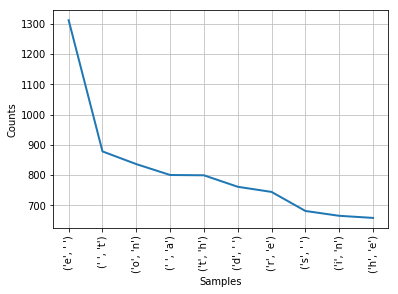

In [11]:
freq_bi.plot(10)

What's the problem with this data?

Characters only.

In [23]:
punkt_sentences = sentence_tokenizer.tokenize(text_corpus)
sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
all_tokens = [word for sentence in sentences_words for word in sentence]
bigrams = nltk.bigrams(all_tokens)
freq_bi = nltk.FreqDist(bigrams)

[(('of', 'the'), 65), ((',', 'and'), 57), (('.', 'The'), 40), (('did', 'not'), 38), (('that', 'the'), 34), ((',', 'the'), 32), (('Air', 'Force'), 23), (('for', 'the'), 23), (('with', 'the'), 23), (('contracting', 'officers'), 22), (('’', 's'), 21), (('.', 'In'), 21), ((',', 'we'), 20), (('and', 'the'), 17), (('In', 'addition'), 17), (('addition', ','), 17), (('Berry', 'Amendment'), 17), (('contracting', 'personnel'), 16), (('.', 'We'), 15), (('in', 'the'), 15)]


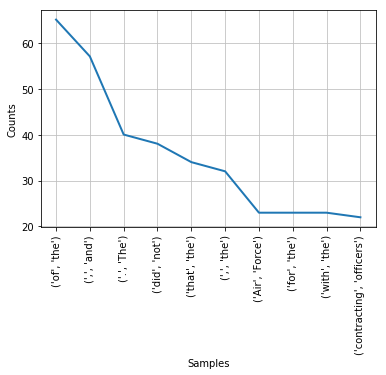

In [24]:
print(freq_bi.most_common(20))
freq_bi.plot(10)

In [25]:
stop_words = nltk.corpus.stopwords.words('english')
content = [w for w in all_tokens if w.lower() not in stop_words]
bigrams = nltk.bigrams(content)
freq_bi = nltk.FreqDist(bigrams)

[(('Air', 'Force'), 23), (('contracting', 'officers'), 22), (('addition', ','), 17), (('Berry', 'Amendment'), 17), (('.', 'addition'), 16), (('contracting', 'personnel'), 16), (('software', 'development'), 14), (('Director', ','), 14), ((',', '2017'), 13), (('.', 'Specifically'), 13), (('Specifically', ','), 13), ((',', 'DCMA'), 13), (('Buy', 'American'), 13), (('American', 'Act'), 13), ((',', 'Defense'), 13), (('business', 'case'), 12), (('DCMA', 'officials'), 12), (('Defense', 'Logistics'), 12), (('Logistics', 'Agency'), 12), (('case', 'analysis'), 11)]


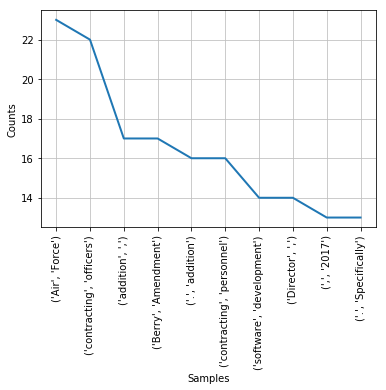

In [26]:
print(freq_bi.most_common(20))
freq_bi.plot(10)

What other things might we remove?

Numbers? Punctuation?

In [30]:
print(freq_bi.hapaxes())
print(freq_bi.N())
print(freq_bi.freq(('May','21')))

[('May', '21'), ('whether', 'Air'), ('updated', 'Eagle'), ('Eagle', 'Passive/Active'), ('Passive/Active', 'Warning'), ('Warning', 'Survivability'), ('Survivability', 'System'), ('System', '('), ('(', 'EPAWSS'), ('EPAWSS', ')'), (')', 'test'), ('officials', ','), (',', 'developed'), (',', 'evaluated'), ('evaluated', 'F-15C'), ('production', 'plan'), ('plan', 'engineering'), ('Force', '’'), ('’', 'EPAWSS'), ('program', 'acquisition'), ('acquisition', 'category'), ('category', 'IC'), ('IC', 'major'), ('major', 'defense'), ('defense', 'program'), ('program', 'estimated'), ('estimated', 'program'), ('program', 'costs'), ('costs', '$'), ('$', '876'), ('876', 'million'), ('million', 'research'), ('research', ','), (',', 'development'), ('development', ','), ('test', ','), (',', 'evaluation'), ('evaluation', ','), (',', '$'), ('$', '3.4'), ('3.4', 'billion'), ('billion', 'procurement.1'), ('procurement.1', 'EPAWSS'), ('EPAWSS', 'upgrades'), ('upgrades', 'F-15C'), ('F-15C', 'F-15E'), ('aircraft

In [34]:
MLE_Dist = nltk.MLEProbDist(freq_bi)
MLE_Dist.max()
print(MLE_Dist.prob(('Air', 'Force')))
print(MLE_Dist.logprob(('Air', 'Force')) )

0.004333082140165787
-7.850390699313181


But what if we use words that we've never seen before?

In [35]:
print(MLE_Dist.prob(('Chair', 'Force')))
print(MLE_Dist.logprob(('Chair', 'Force')) )

0.0
-1e+300


In [37]:
Smoothed_dist = nltk.LaplaceProbDist(freq_bi)
print(Smoothed_dist.prob(('Chair', 'Force')))
print(Smoothed_dist.logprob(('Chair', 'Force')) )

0.0001152073732718894
-13.083479327331842


In [38]:
print(Smoothed_dist.generate())

('non-HIV', 'mission')


In [54]:
test_sentence_1 = "The quantity decrease of the production units and the removal of funds occurred because the decided to use procurement funds to develop a higher priority air superiority program."
test_sentence_2 = "It is like totally rad that we were able to go out and see a bus with all the new doors on it."

def get_sentence_bigrams(sentence):
    sentence_words = treebank_tokenizer.tokenize(sentence)
    word_count = len(sentence_words)
    bigrams = nltk.bigrams(sentence_words)
    return bigrams, word_count
    
def estimate_sentence_probability(bigram_sentence, word_length):
    slogprob = 0
    for bigram_words in bigram_sentence:
        logprob= Smoothed_dist.logprob(bigram_words)
        slogprob += logprob
     
    return slogprob/word_length


bigram_sentence,word_count = get_sentence_bigrams(test_sentence_1)
estimate_probability = estimate_sentence_probability(bigram_sentence, word_count)
print(estimate_probability)

bigram_sentence_2,word_count = get_sentence_bigrams(test_sentence_2)
estimate_probability_2 = estimate_sentence_probability(bigram_sentence_2, word_count)
print(estimate_probability_2)



-12.176158706027435
-12.538334355359678


Do these numbers look right?

In [55]:
def get_better_sentence_bigrams(sentence):
    sentence_words = treebank_tokenizer.tokenize(sentence)
    stop_words = nltk.corpus.stopwords.words('english')
    content = [w for w in sentence_words if w.lower() not in stop_words]
    word_count = len(sentence_words)
    bigrams = nltk.bigrams(content)
    return bigrams, word_count
    

bigram_sentence, word_count = get_better_sentence_bigrams(test_sentence_1)
estimate_probability = estimate_sentence_probability(bigram_sentence, word_count)
print(estimate_probability)

bigram_sentence, word_count = get_better_sentence_bigrams(test_sentence_2)
estimate_probability = estimate_sentence_probability(bigram_sentence, word_count)
print(estimate_probability)

-7.041045857729153
-4.906304747749441
